In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Machine Learning 2/Churn_Modelling.csv')
df.sample(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6620,6621,15751297,Wilson,732,France,Male,36,5,0.00,2,1,0,161428.25,0
1446,1447,15680855,Iloabuchi,637,France,Male,33,2,145731.83,1,0,1,109219.43,0
1306,1307,15709117,Fanucci,823,Spain,Female,46,3,81576.75,1,1,1,28370.95,1
1707,1708,15732832,Jideofor,707,France,Female,40,5,0.00,2,1,0,41052.82,0
6570,6571,15790958,Sanders,685,Spain,Male,38,4,0.00,2,1,1,35884.91,0


In [16]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


credit score : số thẻ (350-850)

age : tuổi trung bình 38,9 tuổi người trẻ nhất là 18 tuổi và người giá nhất là 92 tuổi, 75% số người trong dữ liệu là người dưới 44 tuổi

tenure : số năm mà 1 người trở thành khách hàng của ngân hàng đó

balance : số dư trong tài khoản

numberofproducts : số sản phẩm mà khách hàng đã mua qua ngân hàng

hashcreditcart: có thể tín dụng hay không

isactivemember : khách hàng có kích hoạt thẻ hay không

EstimatedSalary : thu nhập ước tính của khách hàng

Excited : khách hàng đã rời bỏ dịch vụ hay chưa




In [17]:
df.drop(columns = ['CustomerId', 'RowNumber', 'Surname'], inplace=True)

In [18]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
for col in df.columns:
  print(col, ':', len(df[col].value_counts()))

CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


In [20]:
age_df = df.groupby(by=['Age', 'Exited']).agg('count')
#chuyển đổi dữ liệu đã nhóm lại thành một DataFrame thông thường.
age_df.reset_index(drop=False, inplace=True)
age_df_retain = age_df[age_df['Exited'] == 0][['Age', 'CreditScore']]
age_df_retain = age_df_retain.rename(columns={"CreditScore": "Total_retain"})

age_df_churn = age_df[age_df['Exited'] == 1][['Age', 'CreditScore']]
age_df_churn = age_df_churn.rename(columns={"CreditScore": "Total_churn"})
#Outer Ví dụ khi sử dụng outer age 18 có  total = 0 thì nó vẫn sẽ giữ lại Nếu không dùng outer thì nó sẽ mất đi cột hàng đó
ageAndExited = pd.merge(age_df_retain,age_df_churn, how='outer', left_on='Age', right_on='Age')
#Hàm fillna(0, inplace=True) điền bất kỳ giá trị thiếu nào trong ageAndExited (có thể xảy ra do liên kết ngoài) bằng số 0.
#Ví dụ 0 thì sẽ thêm thành 0.0 nếu bỏ đi fillna(0, inplace=True) thì nó sẽ biến thành NaN
ageAndExited['ratio'] = ageAndExited.fillna(0,inplace=True)
ageAndExited['ratio'] = ageAndExited['Total_churn']*100/(ageAndExited['Total_retain'] + ageAndExited['Total_churn'])
ageAndExited['EstimatedSalary'] = ageAndExited.fillna(0,inplace=True)
ageAndExited['EstimatedSalary'] = ageAndExited['Total_churn']*100/(ageAndExited['Total_retain'] + ageAndExited['Total_churn'])
ageAndExited




,Age,Total_retain,Total_churn,ratio,EstimatedSalary
0,18,20,2.0,9.090909,9.090909
1,19,26,1.0,3.703704,3.703704
2,20,38,2.0,5.000000,5.000000
3,21,50,3.0,5.660377,5.660377
4,22,72,12.0,14.285714,14.285714
...,...,...,...,...,...
65,83,1,0.0,0.000000,0.000000
66,84,1,1.0,50.000000,50.000000
67,85,1,0.0,0.000000,0.000000
68,88,1,0.0,0.000000,0.000000


<Axes: xlabel='Age', ylabel='ratio'>

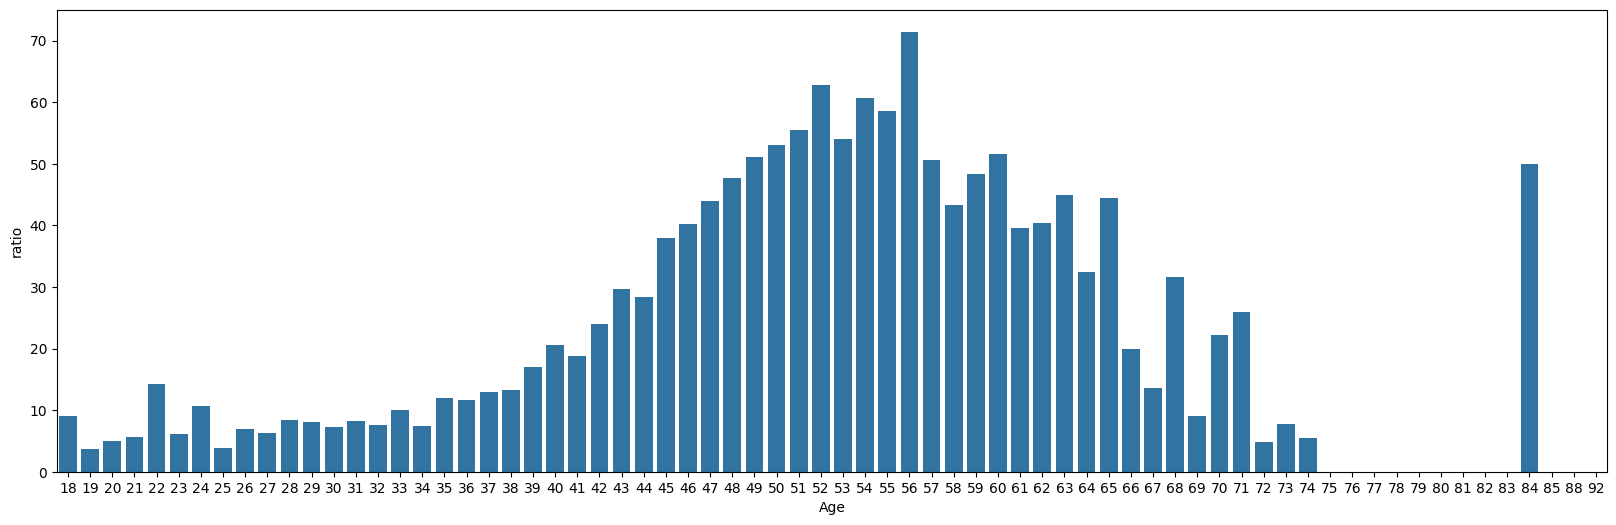

In [21]:
#Tham số figsize được sử dụng để đặt kích thước biểu đồ (15 inch chiều rộng và 6 inch chiều cao).
fig, ax = plt.subplots(figsize=[20 ,6])
sns.barplot(data=ageAndExited, x='Age', y='ratio')

Tỉ lệ người rời bỏ cao nhất rơi vào tuổi 56, khoảng tuổi có tỉ lệ rời bỏ cao nhất là 45-> 65

Ở tuổi 84 vì chỉ có 2 người trong data tỉ lệ rời bỏ và không rời bỏ là 1:1 nên là 50%


In [22]:
def ratio(nation):
  print(len(df[df['Geography']==str(nation)]))
  print(len(df[(df['Geography']==str(nation))&(df['Age'] >= 45)&(df['Age']<=65)]))
  return len(df[(df['Geography']==str(nation))&(df['Age'] >= 45)&(df['Age']<=65)])/len(df[df['Geography']==str(nation)])

In [23]:
for i in ['Germany', 'France', 'Spain']:
  print(i, ':', '{:.2f}'.format(ratio(i)))

2509
624
Germany : 0.25
5014
947
France : 0.19
2477
505
Spain : 0.20


# Tenure

In [24]:

#chuyển đổi dữ liệu đã nhóm lại thành một DataFrame thông thường.
df_ten_churn = df[df['Exited'] == 1].groupby('Tenure').agg('count')
df_ten_churn.reset_index(drop=False, inplace=True)
df_ten_churn = df_ten_churn[['Tenure', 'CreditScore']]
df_ten_churn = df_ten_churn.rename(columns={"CreditScore": "Total"})

df_ten_retain = df[df['Exited'] == 0].groupby('Tenure').agg('count')
df_ten_retain.reset_index(drop=False, inplace=True)
df_ten_retain = df_ten_retain[['Tenure', 'CreditScore']]
df_ten_retain = df_ten_retain.rename(columns={"CreditScore": "Total"})
#Outer Ví dụ khi sử dụng outer age 18 có  total = 0 thì nó vẫn sẽ giữ lại Nếu không dùng outer thì nó sẽ mất đi cột hàng đó
df_ten = pd.merge(df_ten_churn,df_ten_retain, how='outer', on='Tenure', suffixes=('_churn', '_retain'))
#Hàm fillna(0, inplace=True) điền bất kỳ giá trị thiếu nào trong ageAndExited (có thể xảy ra do liên kết ngoài) bằng số 0.
#Ví dụ 0 thì sẽ thêm thành 0.0 nếu bỏ đi fillna(0, inplace=True) thì nó sẽ biến thành NaN
df_ten['ratio'] = df_ten['Total_churn']/(df_ten['Total_churn'] + df_ten['Total_retain'])

df_ten


,Tenure,Total_churn,Total_retain,ratio
0,0,95,318,0.230024
1,1,232,803,0.224155
2,2,201,847,0.191794
3,3,213,796,0.211100
4,4,203,786,0.205258
5,5,209,803,0.206522
6,6,196,771,0.202689
7,7,177,851,0.172179
8,8,197,828,0.192195
9,9,213,771,0.216463


<Axes: xlabel='Tenure', ylabel='ratio'>

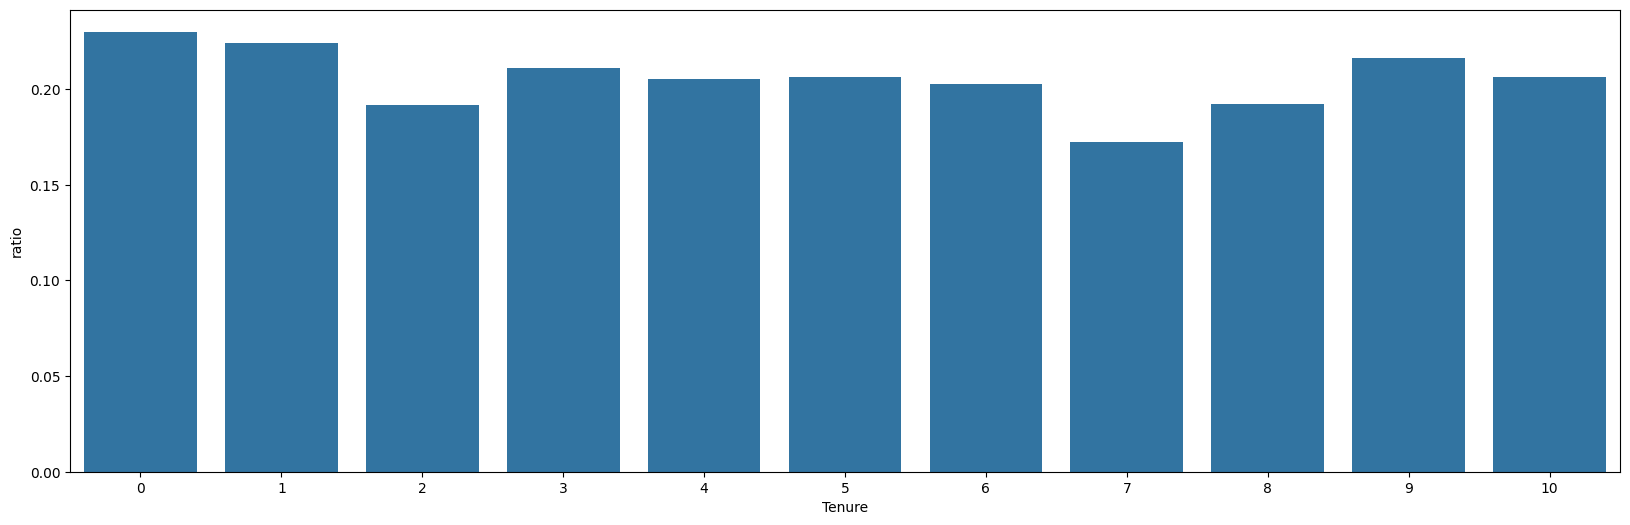

In [25]:
fig, ax = plt.subplots(figsize=[20 ,6])
sns.barplot(data=df_ten, x='Tenure', y='ratio')

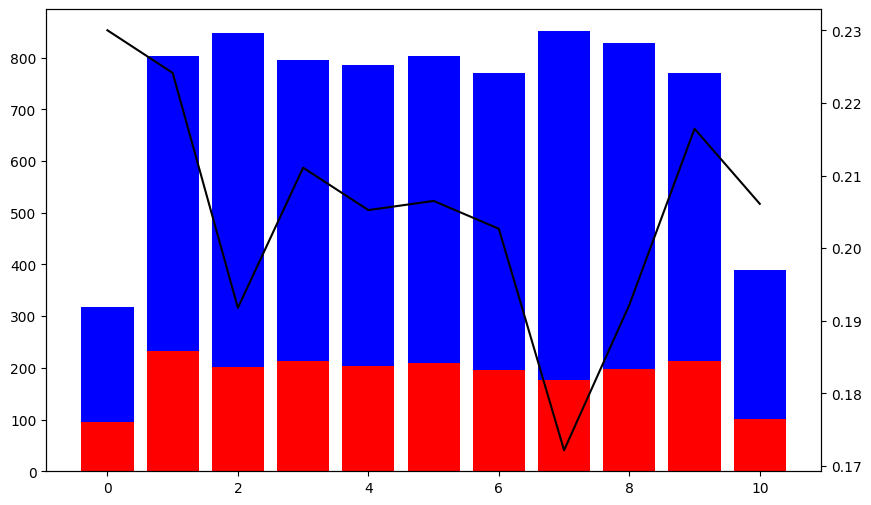

In [26]:
fig, ax = plt.subplots(figsize=[10 ,6])
ax.bar(x=df_ten['Tenure'], height=df_ten['Total_retain'], label='Total_retain', color='Blue')
ax.bar(x=df_ten['Tenure'], height=df_ten['Total_churn'], label='Total_churn', color='Red')
ax2= ax.twinx()
ax2.plot(df_ten['Tenure'], df_ten.ratio, color='black')

# Estimated Salary

In [27]:
df_sal_fe = df[df['Gender']=='Female'][['Exited', 'EstimatedSalary']]
df_sal_ma = df[df['Gender']=='Male'][['Exited', 'EstimatedSalary']]
df_sal_fe.groupby(by='Exited').agg("mean")




,EstimatedSalary
Exited,
0,99816.071486
1,102948.986093


In [28]:
df_sal_ma.groupby(by='Exited').agg("mean")


,EstimatedSalary
Exited,
0,99680.391827
1,99584.287272


# Geography

In [29]:
df_geo = df.groupby(by=['Geography']).agg('count')
df_geo.reset_index(drop=False, inplace=True)
df_geo = df_geo[['Geography', 'Age']]
df_geo.rename(inplace=True,columns={"Age": "count"})
df_geo




,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


In [30]:
df_geo_churn = df[df['Exited'] == 1].groupby(by=['Geography']).agg('count')
df_geo_churn.reset_index(drop=False, inplace=True)
df_geo_churn = df_geo_churn[['Geography', 'Age']]
df_geo_churn.rename(inplace= True, columns={"Age": "count"})
df_geo_churn
print(df_geo_churn['count'])
df_geo['total_churn'] = df_geo_churn['count']
df_geo['churn_ratio'] = df_geo['total_churn']/df_geo['count']
df_geo




0    810
1    814
2    413
Name: count, dtype: int64


,Geography,count,total_churn,churn_ratio
0,France,5014,810,0.161548
1,Germany,2509,814,0.324432
2,Spain,2477,413,0.166734


In [31]:
df_f = df[df['Geography'] == 'France']
df_f.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000
mean,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
std,97.016799,10.469459,2.888475,64133.565524,0.570347,0.455356,0.499769,57336.289016,0.368072
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,582.000000,31.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51399.190000,0.000000
50%,653.000000,37.000000,5.000000,62153.500000,1.000000,1.000000,1.000000,99132.310000,0.000000
75%,717.000000,43.000000,7.000000,121444.877500,2.000000,1.000000,1.000000,149295.360000,0.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199929.170000,1.000000


In [32]:
df_f = df[df['Geography'] == 'Germany']
df_f.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000
mean,651.453567,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432
std,98.168937,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256
min,350.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000
50%,651.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000
75%,722.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000
max,850.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000


In [33]:
df_f = df[df['Geography'] == 'Spain']
df_f.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734
std,94.365051,10.446119,2.856660,64235.555208,0.564646,0.460588,0.499220,57103.678091,0.372813
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,417.410000,0.000000
25%,587.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50267.690000,0.000000
50%,651.000000,37.000000,5.000000,61710.440000,2.000000,1.000000,1.000000,99984.860000,0.000000
75%,715.000000,44.000000,8.000000,121056.630000,2.000000,1.000000,1.000000,147278.430000,0.000000
max,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<ipython-input-34-860e44fe52a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Balance'])


<Axes: xlabel='Balance', ylabel='Density'>

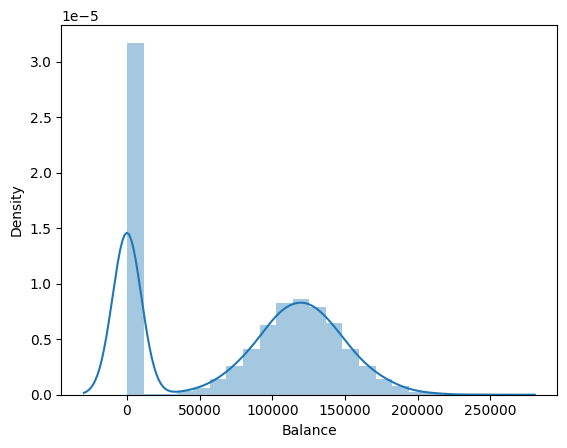

In [34]:
sns.distplot(df['Balance'])

In [35]:
df1 = df[df['Balance'] ==0]
len(df1[df1['Exited'] == 1])/ len(df1)

0.13823610727121924

In [36]:
def group_balance(bal):
  if int(bal) ==0 :
    return 0
  if int(bal) in range(1, 50000):
    return 1
  elif int(bal) in range(50000, 100000):
    return 50
  elif int(bal) in range(100000,150000 ):
    return 100
  elif int(bal) in range(150000,200000 ):
    return 150
  elif int(bal) in range(200000,250000 ):
    return 200
  else:
    return 250

In [37]:
df['group_balance'] = df['Balance'].map(group_balance)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,group_balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,150
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,50
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,50


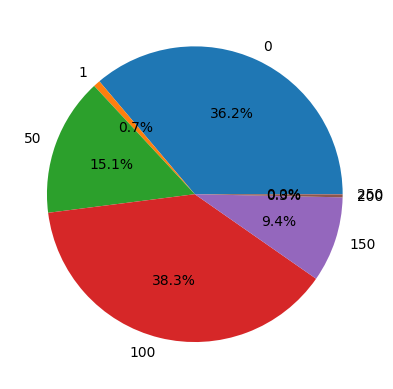

In [38]:
df_group_balance = df.groupby(by=['group_balance']).agg('count')
df_group_balance.reset_index(drop=False, inplace=True)
labels = df_group_balance['group_balance']
fig1, ax1 = plt.subplots()
ax1.pie(df_group_balance['Age'], labels=labels,autopct='%1.1f%%')
plt.show()

In [39]:
df_balance = df.groupby(by=['group_balance', 'Exited']).agg('count')
df_balance.reset_index(drop=False, inplace=True)
df_balance = df_balance.rename(columns={"Age": "count"})
df_balance = df_balance[['group_balance', 'Exited', 'count']]
df_balance_churn = df_balance[df_balance['Exited'] ==1]
df_balance_retain = df_balance[df_balance['Exited'] ==0]
df_balance.reset_index(drop=False, inplace=True)




In [40]:
df_balance = pd.merge(df_balance_retain, df_balance_churn, how='outer', on='group_balance', suffixes=('_retain', '_churn'))
df_balance

,group_balance,Exited_retain,count_retain,Exited_churn,count_churn
0,0,0.0,3117.0,1,500
1,1,0.0,49.0,1,26
2,50,0.0,1209.0,1,300
3,100,0.0,2843.0,1,987
4,150,0.0,730.0,1,205
5,200,0.0,15.0,1,18
6,250,NaN,NaN,1,1


In [41]:
df_balance.drop(columns=['Exited_churn', 'Exited_retain'], inplace = True)
df_balance['ratio'] = df_balance['count_churn']/(df_balance['count_churn'] + df_balance['count_retain'])
df_balance

,group_balance,count_retain,count_churn,ratio
0,0,3117.0,500,0.138236
1,1,49.0,26,0.346667
2,50,1209.0,300,0.198807
3,100,2843.0,987,0.257702
4,150,730.0,205,0.219251
5,200,15.0,18,0.545455
6,250,NaN,1,NaN


# HasCredit Card

<Axes: xlabel='HasCrCard', ylabel='count'>

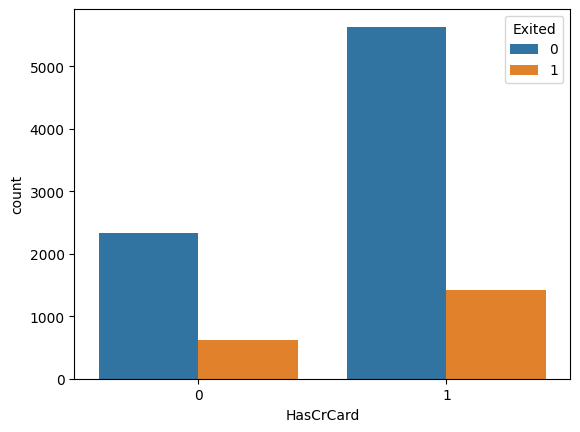

In [42]:
df_hasCreditCard = df.groupby(by=['Exited', 'HasCrCard']).agg('count')
df_hasCreditCard.reset_index(drop=False, inplace=True)
df_hasCreditCard = df_hasCreditCard[['Exited', 'HasCrCard', 'Age']]
df_hasCreditCard.rename(columns={"Age": "count"}, inplace=True)
df_hasCreditCard_churn = df_hasCreditCard[df_hasCreditCard['Exited'] ==1]
df_hasCreditCard_retain = df_hasCreditCard[df_hasCreditCard['Exited'] ==0]

df_hasCreditCard = pd.merge(df_hasCreditCard_retain, df_hasCreditCard_churn, how='outer', on='HasCrCard', suffixes=('_retain', '_churn'))
df_hasCreditCard.drop(columns=['Exited_retain', 'Exited_churn'], inplace=True)
df_hasCreditCard['ratio']=df_hasCreditCard['count_churn']/(df_hasCreditCard['count_churn']+df_hasCreditCard['count_retain'])
df_hasCreditCard
sns.countplot(data=df,x='HasCrCard',hue='Exited')
# fig, ax = plt.subplots(figsize=[20 ,6])
# sns.barplot(data=df_hasCreditCard, x='HasCrCard', y='ratio')


# Credit Score

<ipython-input-43-29c59dec5a1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CreditScore'])


<Axes: xlabel='CreditScore', ylabel='Density'>

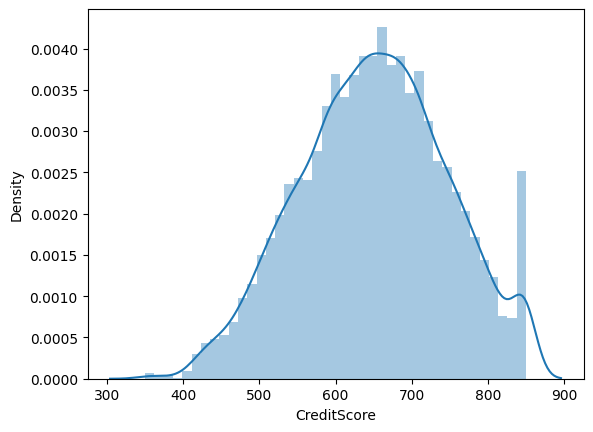

In [43]:
sns.distplot(df['CreditScore'])


<ipython-input-44-b8a4fe73c65b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Geography']==i]['CreditScore'],ax=axes[y], axlabel=i)
<ipython-input-44-b8a4fe73c65b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Geography']==i]['CreditScore'],ax=axes[y], axlabel=i)
<ipython-inp

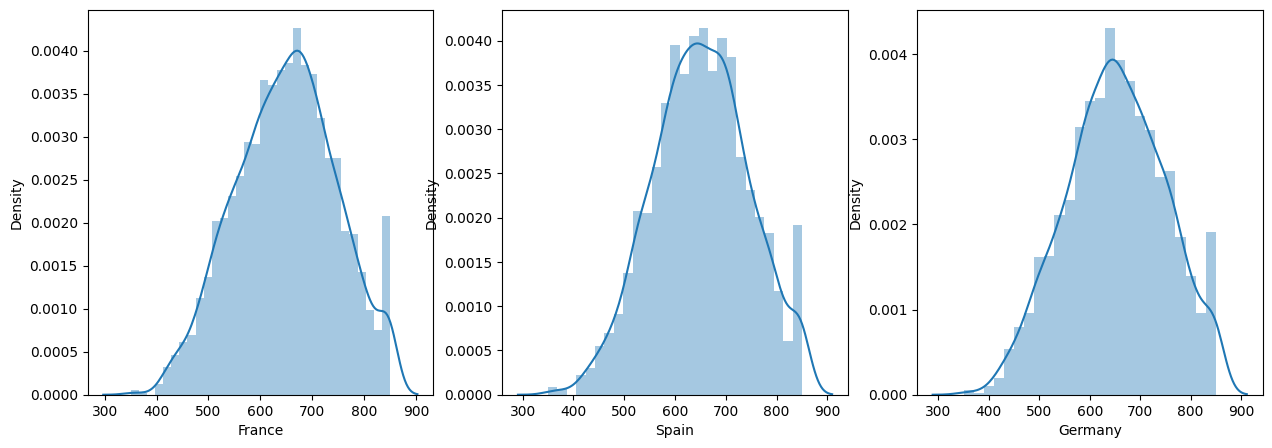

In [44]:
geo = ['France', 'Spain', 'Germany']
fig, axes = plt.subplots(1,3, figsize=(10,5))
for index,i in enumerate(geo):
  y = index%3
  sns.distplot(df[df['Geography']==i]['CreditScore'],ax=axes[y], axlabel=i)

plt.subplots_adjust(hspace=1, right=1.3)

# Is Active Member

<Axes: xlabel='IsActiveMember', ylabel='count'>

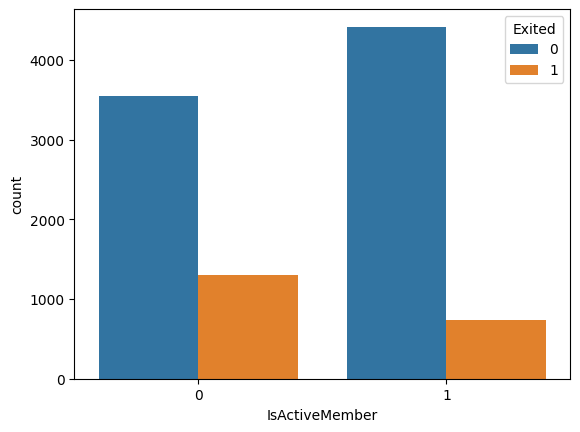

In [45]:
sns.countplot(data=df,x='IsActiveMember',hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

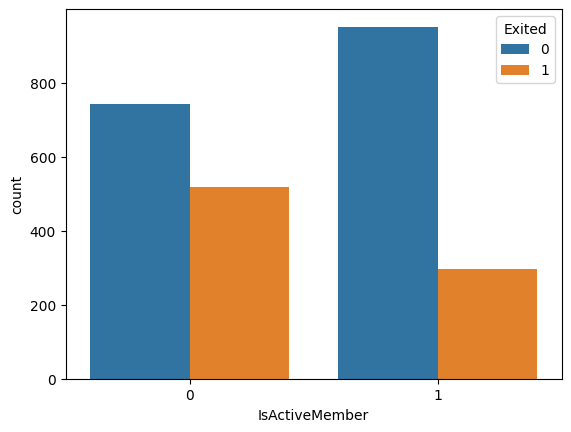

In [46]:
sns.countplot(data=df[df['Geography']=='Germany'],x='IsActiveMember',hue='Exited')


<Axes: xlabel='IsActiveMember', ylabel='count'>

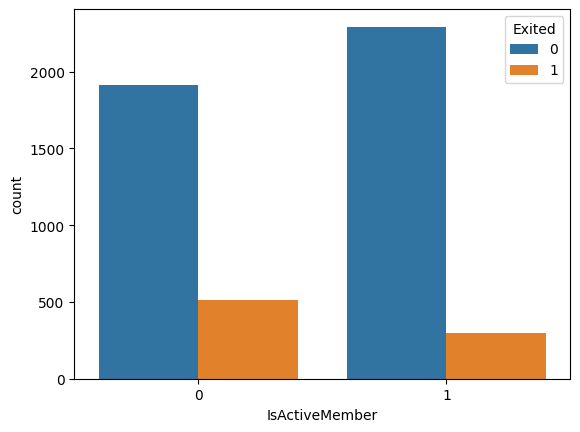

In [47]:
sns.countplot(data=df[df['Geography']=='France'],x='IsActiveMember',hue='Exited')


<Axes: xlabel='IsActiveMember', ylabel='count'>

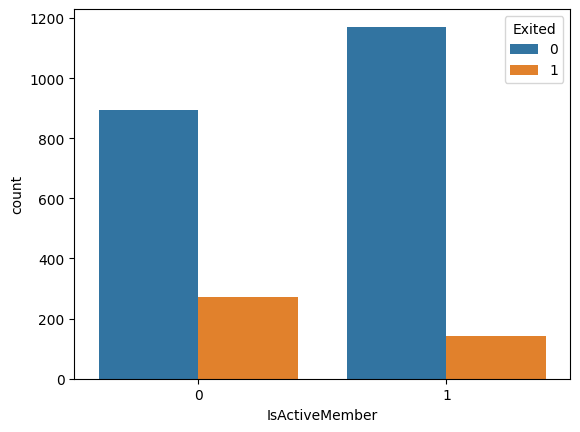

In [48]:
sns.countplot(data=df[df['Geography']=='Spain'],x='IsActiveMember',hue='Exited')


# Number of Products

In [49]:
df_products = df.groupby(by=['Exited', 'NumOfProducts']).agg('count')
df_products.reset_index(drop=False, inplace=True)
df_products = df_products[['Exited', 'NumOfProducts', 'CreditScore']]
df_products=df_products.rename(columns={"CreditScore": "Total"})
df_products


,Exited,NumOfProducts,Total
0,0,1,3675
1,0,2,4242
2,0,3,46
3,1,1,1409
4,1,2,348
5,1,3,220
6,1,4,60


<Axes: xlabel='NumOfProducts', ylabel='Total'>

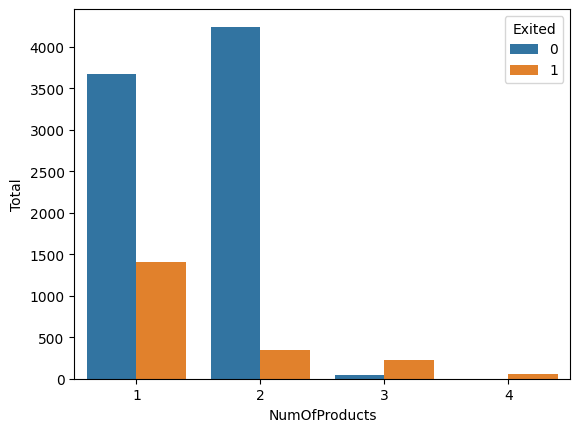

In [50]:
sns.barplot(data=df_products,x='NumOfProducts',y='Total',hue='Exited')

# Geography and Gender

In [51]:
df_geo = df.groupby(by=['Geography','Exited', 'Gender']).agg('count')
df_geo = df_geo.rename(columns={"CreditScore": "Count"})
df_geo = df_geo[['Count']]
df_geo.reset_index(drop=False, inplace=True)
df_geo




,Geography,Exited,Gender,Count
0,France,0,Female,1801
1,France,0,Male,2403
2,France,1,Female,460
3,France,1,Male,350
4,Germany,0,Female,745
5,Germany,0,Male,950
6,Germany,1,Female,448
7,Germany,1,Male,366
8,Spain,0,Female,858
9,Spain,0,Male,1206


In [52]:
df_geo_churn = df_geo[df_geo['Exited'] == 1]
df_geo_churn['geo_gen'] = df_geo_churn['Geography'] + '-' + df_geo_churn['Gender']
df_geo_churn

<ipython-input-52-bd7944f56420>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_churn['geo_gen'] = df_geo_churn['Geography'] + '-' + df_geo_churn['Gender']


,Geography,Exited,Gender,Count,geo_gen
2,France,1,Female,460,France-Female
3,France,1,Male,350,France-Male
6,Germany,1,Female,448,Germany-Female
7,Germany,1,Male,366,Germany-Male
10,Spain,1,Female,231,Spain-Female
11,Spain,1,Male,182,Spain-Male


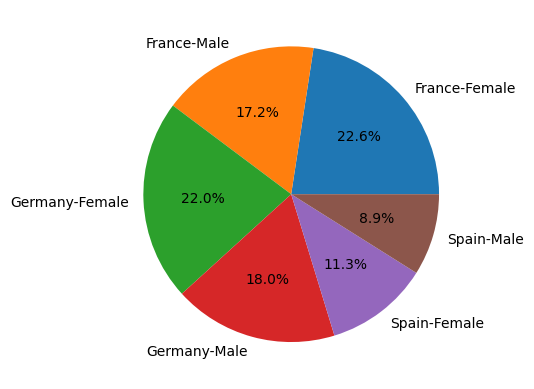

In [53]:
labels = df_geo_churn['geo_gen']
fig1, ax1 = plt.subplots()
ax1.pie(df_geo_churn['Count'], labels=labels, autopct='%1.1f%%')
plt.show()

In [54]:
df_geo_retain = df_geo[df_geo['Exited'] == 0]
df_geo_retain['geo_gen'] = df_geo_retain['Geography'] + '-' + df_geo_retain['Gender']
df_geo_retain

<ipython-input-54-3e53dcbe0b64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_retain['geo_gen'] = df_geo_retain['Geography'] + '-' + df_geo_retain['Gender']


,Geography,Exited,Gender,Count,geo_gen
0,France,0,Female,1801,France-Female
1,France,0,Male,2403,France-Male
4,Germany,0,Female,745,Germany-Female
5,Germany,0,Male,950,Germany-Male
8,Spain,0,Female,858,Spain-Female
9,Spain,0,Male,1206,Spain-Male


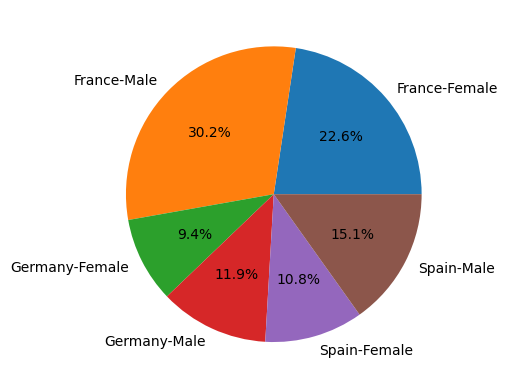

In [55]:
labels = df_geo_retain['geo_gen']
fig1, ax1 = plt.subplots()
ax1.pie(df_geo_retain['Count'], labels=labels, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='geo_gen', ylabel='ratio'>

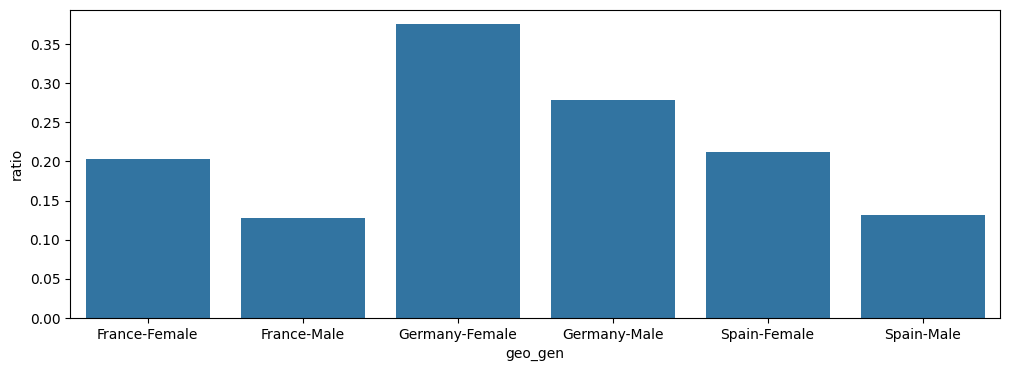

In [56]:
df_sum = pd.merge(df_geo_retain, df_geo_churn , how='outer', on=['geo_gen','Geography','Gender'], suffixes=('_retain', '_churn'))
df_sum['ratio']=df_sum['Count_churn']/(df_sum['Count_churn']+df_sum['Count_retain'])
df_sum
fig,ax = plt.subplots(figsize=[12,4])
sns.barplot(data=df_sum,x='geo_gen',y='ratio')




# Tenure and Gender

In [57]:
df_ten_gen = df.groupby(by=['Tenure','Exited', 'Gender']).agg('count')
df_ten_gen.reset_index(drop=False, inplace=True)
df_ten_gen = df_ten_gen[['Tenure', 'Gender', 'Exited', 'CreditScore']]
df_ten_gen = df_ten_gen.rename(columns={"CreditScore": "Count"})
df_ten_gen




,Tenure,Gender,Exited,Count
0,0,Female,0,149
1,0,Male,0,169
2,0,Female,1,55
3,0,Male,1,40
4,1,Female,0,348
5,1,Male,0,455
6,1,Female,1,130
7,1,Male,1,102
8,2,Female,0,367
9,2,Male,0,480


<Axes: xlabel='Tenure', ylabel='Count'>

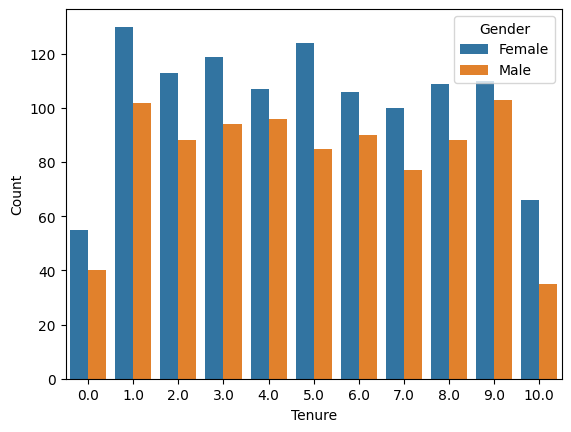

In [58]:
sns.barplot(x=df_ten_gen[df_ten_gen['Exited']==1]['Tenure'],y=df_ten_gen['Count'],hue=df_ten_gen['Gender'])

<Axes: xlabel='Tenure', ylabel='Count'>

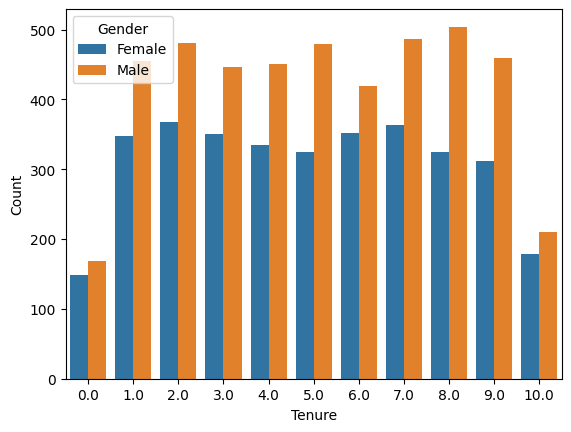

In [59]:
sns.barplot(x=df_ten_gen[df_ten_gen['Exited']==0]['Tenure'],y=df_ten_gen['Count'],hue=df_ten_gen['Gender'])

In [60]:
df_ten_gen_retain = df_ten_gen[df_ten_gen['Exited'] ==0]
df_ten_gen_churn = df_ten_gen[df_ten_gen['Exited'] ==1]
k = pd.merge(df_ten_gen_retain, df_ten_gen_churn, how='inner', on=['Tenure','Gender'], suffixes=('_retain', '_churn'))
k['churn_ratio']=k['Count_churn']/(k['Count_retain']+k['Count_churn'])
k



,Tenure,Gender,Exited_retain,Count_retain,Exited_churn,Count_churn,churn_ratio
0,0,Female,0,149,1,55,0.269608
1,0,Male,0,169,1,40,0.191388
2,1,Female,0,348,1,130,0.271967
3,1,Male,0,455,1,102,0.183124
4,2,Female,0,367,1,113,0.235417
5,2,Male,0,480,1,88,0.154930
6,3,Female,0,350,1,119,0.253731
7,3,Male,0,446,1,94,0.174074
8,4,Female,0,335,1,107,0.242081
9,4,Male,0,451,1,96,0.175503


<Axes: xlabel='Tenure', ylabel='churn_ratio'>

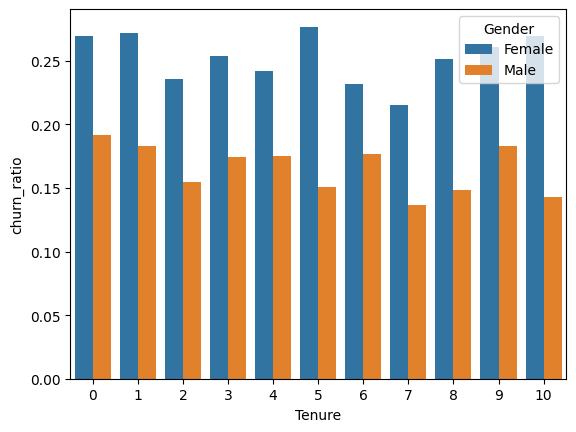

In [61]:
sns.barplot(data=k, x='Tenure',y='churn_ratio', hue='Gender')

In [62]:
len(df[(df['Geography']=='Germany')&(df['Tenure']==7)])/len(df[df['Tenure']==7])

0.2188715953307393

In [63]:
len(df[(df['Geography']=='Germany')&(df['Tenure']==9)])/len(df[df['Tenure']==9])

0.2733739837398374

# Number of products by gender and geography

In [64]:
df_pro = df.groupby(by=['Exited','NumOfProducts', 'Geography']).agg('count')
df_pro.reset_index(drop=False, inplace=True)
df_pro = df_pro[['Exited', 'NumOfProducts', 'CreditScore', 'Geography']]
df_pro = df_pro.rename(columns={"CreditScore": "Count"})
df_pro




,Exited,NumOfProducts,Count,Geography
0,0,1,1950,France
1,0,1,771,Germany
2,0,1,954,Spain
3,0,2,2232,France
4,0,2,914,Germany
5,0,2,1096,Spain
6,0,3,22,France
7,0,3,10,Germany
8,0,3,14,Spain
9,1,1,564,France


<Axes: xlabel='NumOfProducts', ylabel='Count'>

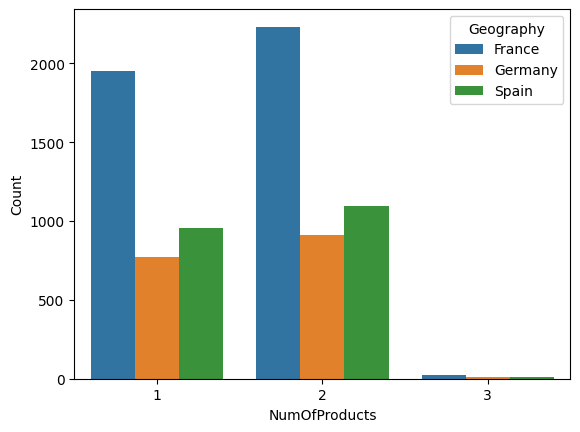

In [65]:
sns.barplot(data=df_pro[df_pro['Exited'] == 0], x='NumOfProducts', y='Count', hue='Geography')

<Axes: xlabel='NumOfProducts', ylabel='Count'>

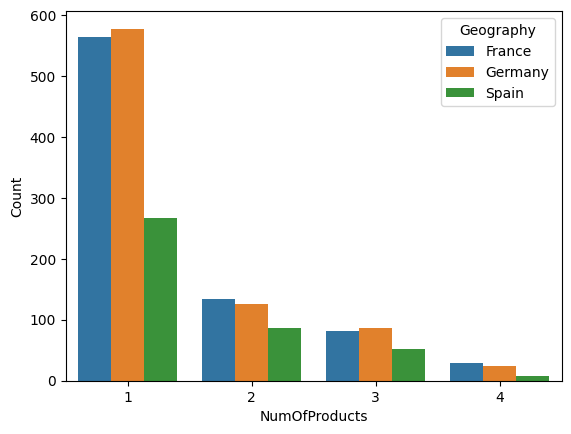

In [66]:
sns.barplot(data=df_pro[df_pro['Exited'] == 1], x='NumOfProducts', y='Count', hue='Geography')

In [67]:
df_product = df.groupby(by=['Exited','NumOfProducts']).agg('count')
df_product.reset_index(drop=False, inplace=True)
df_product = df_product[['Exited', 'NumOfProducts', 'Age']]
df_product = df_product.rename(columns={"Age": "count"})
df_product_retain = df_product[df_product['Exited'] ==0]
df_product_churn = df_product[df_product['Exited'] ==1]

df_product = pd.merge(df_product_retain, df_product_churn, how='outer', on='NumOfProducts', suffixes=('_retain', '_churn'))
df_product.fillna(inplace=True, value = 0)
df_product['churn_ratio']=df_product['count_churn']/(df_product['count_retain']+df_product['count_churn'])
df_product['total_customer'] = df_product['count_churn'] + df_product['count_retain']
df_product





,Exited_retain,NumOfProducts,count_retain,Exited_churn,count_churn,churn_ratio,total_customer
0,0.0,1,3675.0,1,1409,0.277144,5084.0
1,0.0,2,4242.0,1,348,0.075817,4590.0
2,0.0,3,46.0,1,220,0.827068,266.0
3,0.0,4,0.0,1,60,1.000000,60.0


<Axes: xlabel='NumOfProducts', ylabel='churn_ratio'>

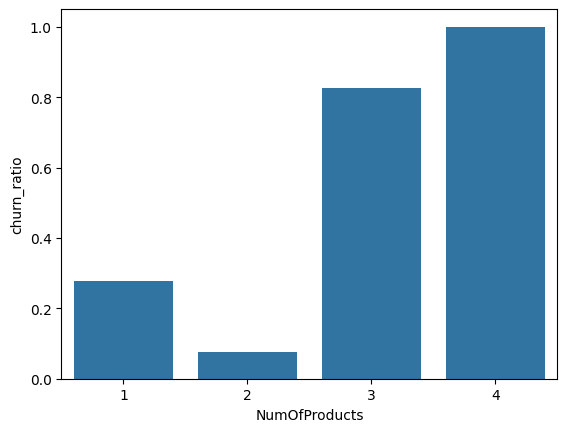

In [68]:
sns.barplot(data=df_product, x='NumOfProducts', y='churn_ratio')

<Axes: xlabel='NumOfProducts', ylabel='count'>

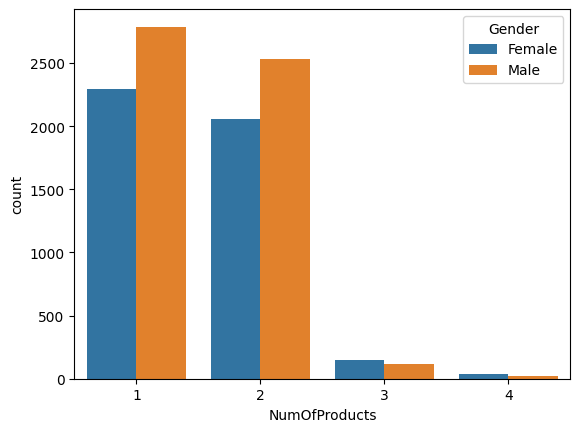

In [69]:
sns.countplot(data=df, x='NumOfProducts', hue='Gender')

In [70]:
outlier_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
# for i in outlier_plot:
  # sns.boxplot(x= df[i])
  # plt.show()

In [71]:
df_copy = df.copy()
df_cleaned = df_copy.copy()

# Logistic Regression

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [73]:
sc = StandardScaler()
for i in ['CreditScore', 'Age', 'Balance','EstimatedSalary']:
  df_cleaned[i] = sc.fit_transform(df_cleaned[i].values.reshape(-1,1))

In [74]:
df_cleaned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,group_balance
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1,0
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0,50
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1,150
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,Male,0.007457,5,-1.225848,2,1,0,-0.066419,0,0
9996,-1.391939,France,Male,-0.373958,10,-0.306379,1,1,1,0.027988,0,50
9997,0.604988,France,Female,-0.278604,7,-1.225848,1,0,1,-1.008643,1,0
9998,1.256835,Germany,Male,0.293517,3,-0.022608,2,1,0,-0.125231,1,50


In [75]:
df_cleaned = df_cleaned.drop(columns = ['group_balance'])
df_cleaned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,Male,0.007457,5,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,France,Male,-0.373958,10,-0.306379,1,1,1,0.027988,0
9997,0.604988,France,Female,-0.278604,7,-1.225848,1,0,1,-1.008643,1
9998,1.256835,Germany,Male,0.293517,3,-0.022608,2,1,0,-0.125231,1


In [76]:
df_cleaned_dum = pd.get_dummies(df_cleaned)
X = df_cleaned_dum.drop(columns=['Exited', 'HasCrCard', 'Balance'], axis=1)
y = df_cleaned_dum['Exited']
X = X.values
y = y.values

In [77]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned,= train_test_split(X, y, test_size = 0.3, random_state = 0)
model = LogisticRegression()
model.fit(X_train_cleaned, y_train_cleaned)


LogisticRegression()

In [78]:
accuracy_score(y_test_cleaned, model.predict(X_test_cleaned))
print(y_test_cleaned)

[0 1 0 ... 0 0 1]


              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2379
           1       0.61      0.21      0.32       621

    accuracy                           0.81      3000
   macro avg       0.72      0.59      0.60      3000
weighted avg       0.78      0.81      0.77      3000



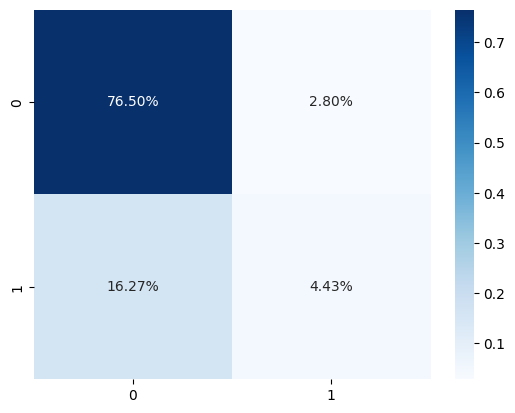

In [79]:
cf_matrix= confusion_matrix(y_test_cleaned, model.predict(X_test_cleaned))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')
print(classification_report(y_test_cleaned, model.predict(X_test_cleaned)))